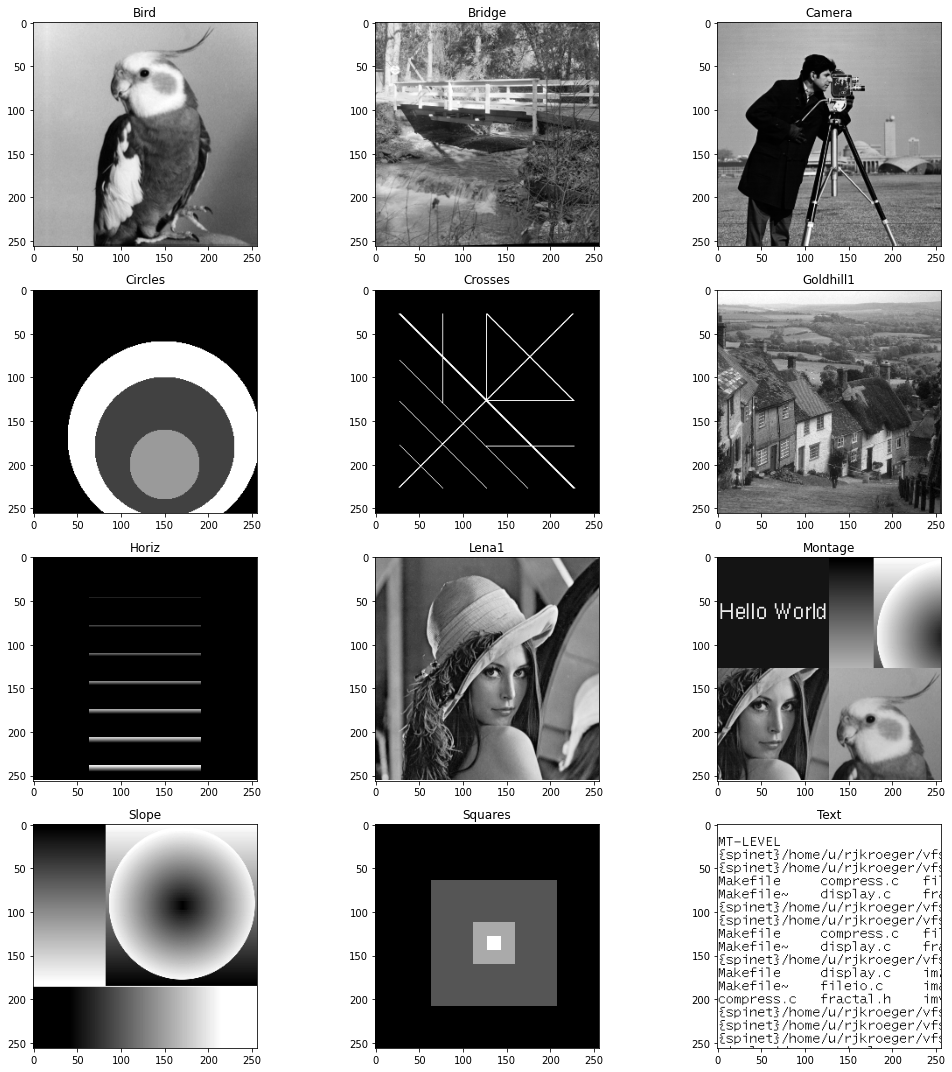

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 3, figsize=(15, 15))

all_ims = ['bird', 'bridge', 'camera', 'circles', 'crosses', 'goldhill1', 'horiz', 'lena1', 'montage', 'slope', 'squares', 'text']
for imInd in range(len(all_ims)):
    im = Image.open(f'images/{all_ims[imInd]}.tif')
    ax[imInd // 3, imInd % 3].imshow(np.array(im), cmap='gray')
    ax[imInd // 3, imInd % 3].set_title(all_ims[imInd].capitalize())

plt.tight_layout()
plt.show()




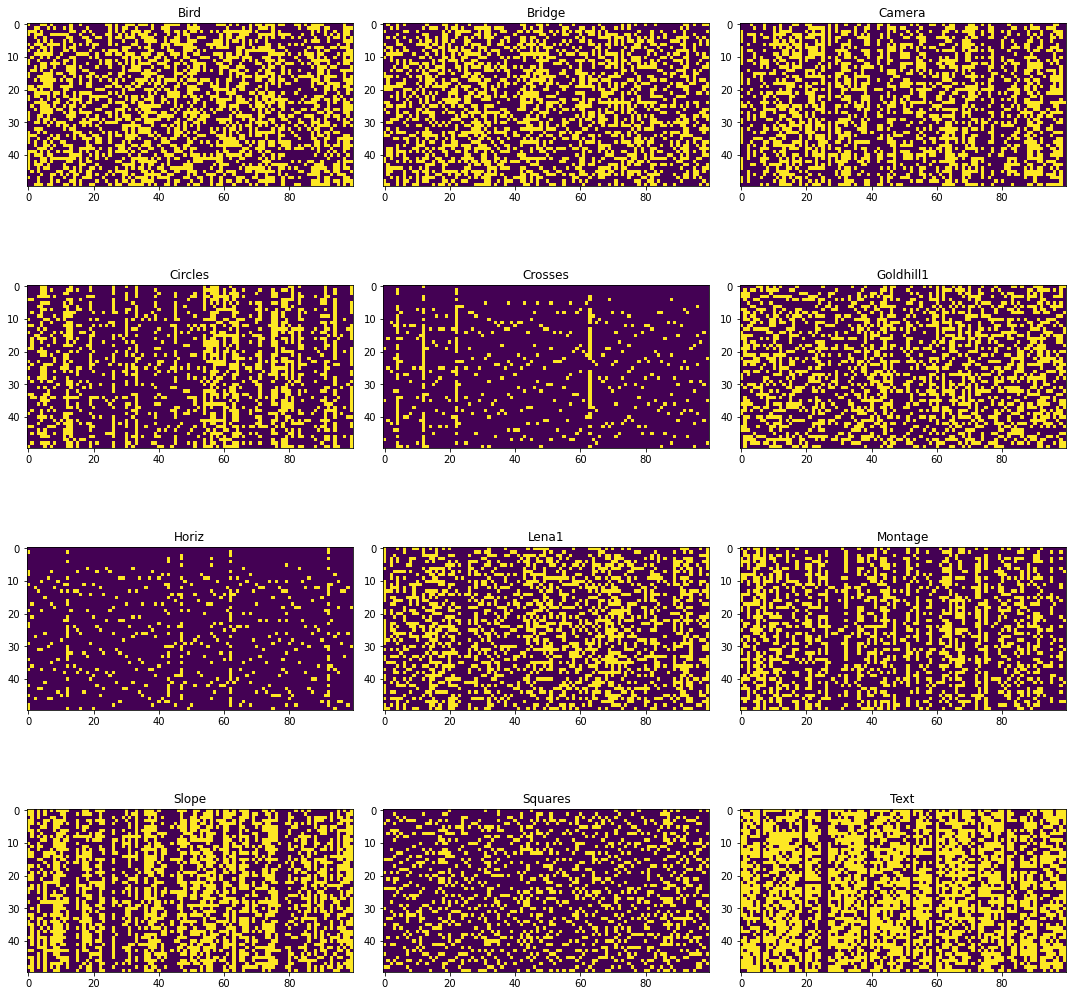

In [3]:
import torch
from encoding import TTFSEncoder, PoissonEncoder, PositionalEncoder
# image_size = 20
# encoder = NumericEncoder(7, image_size, std=10, padding=10)
# data = torch.tensor([[200, 50, 3, 44, 180],
#                      [40, 150, 32, 4, 80],
#                      [45, 40, 120, 100, 10],])

# print('pooled: ', encoder.pool(data, image_size, 'avg'))
# encoded = encoder(data)

# print(len(encoded), encoded)

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

encoder = PoissonEncoder(50, 100)

fig, ax = plt.subplots(4, 3, figsize=(15, 15))

all_ims = ['bird', 'bridge', 'camera', 'circles', 'crosses', 'goldhill1', 'horiz', 'lena1', 'montage', 'slope', 'squares', 'text']
for imInd in range(len(all_ims)):
    im = Image.open(f'images/{all_ims[imInd]}.tif')
    
    encoded = encoder(data=np.array(im), pooling='random')
    # print(encoded)

    ax[imInd // 3, imInd % 3].imshow(encoded)
    ax[imInd // 3, imInd % 3].set_title(all_ims[imInd].capitalize())

plt.tight_layout()
plt.show()



1100xBatch: 1/1 (100%) 3510.578ms


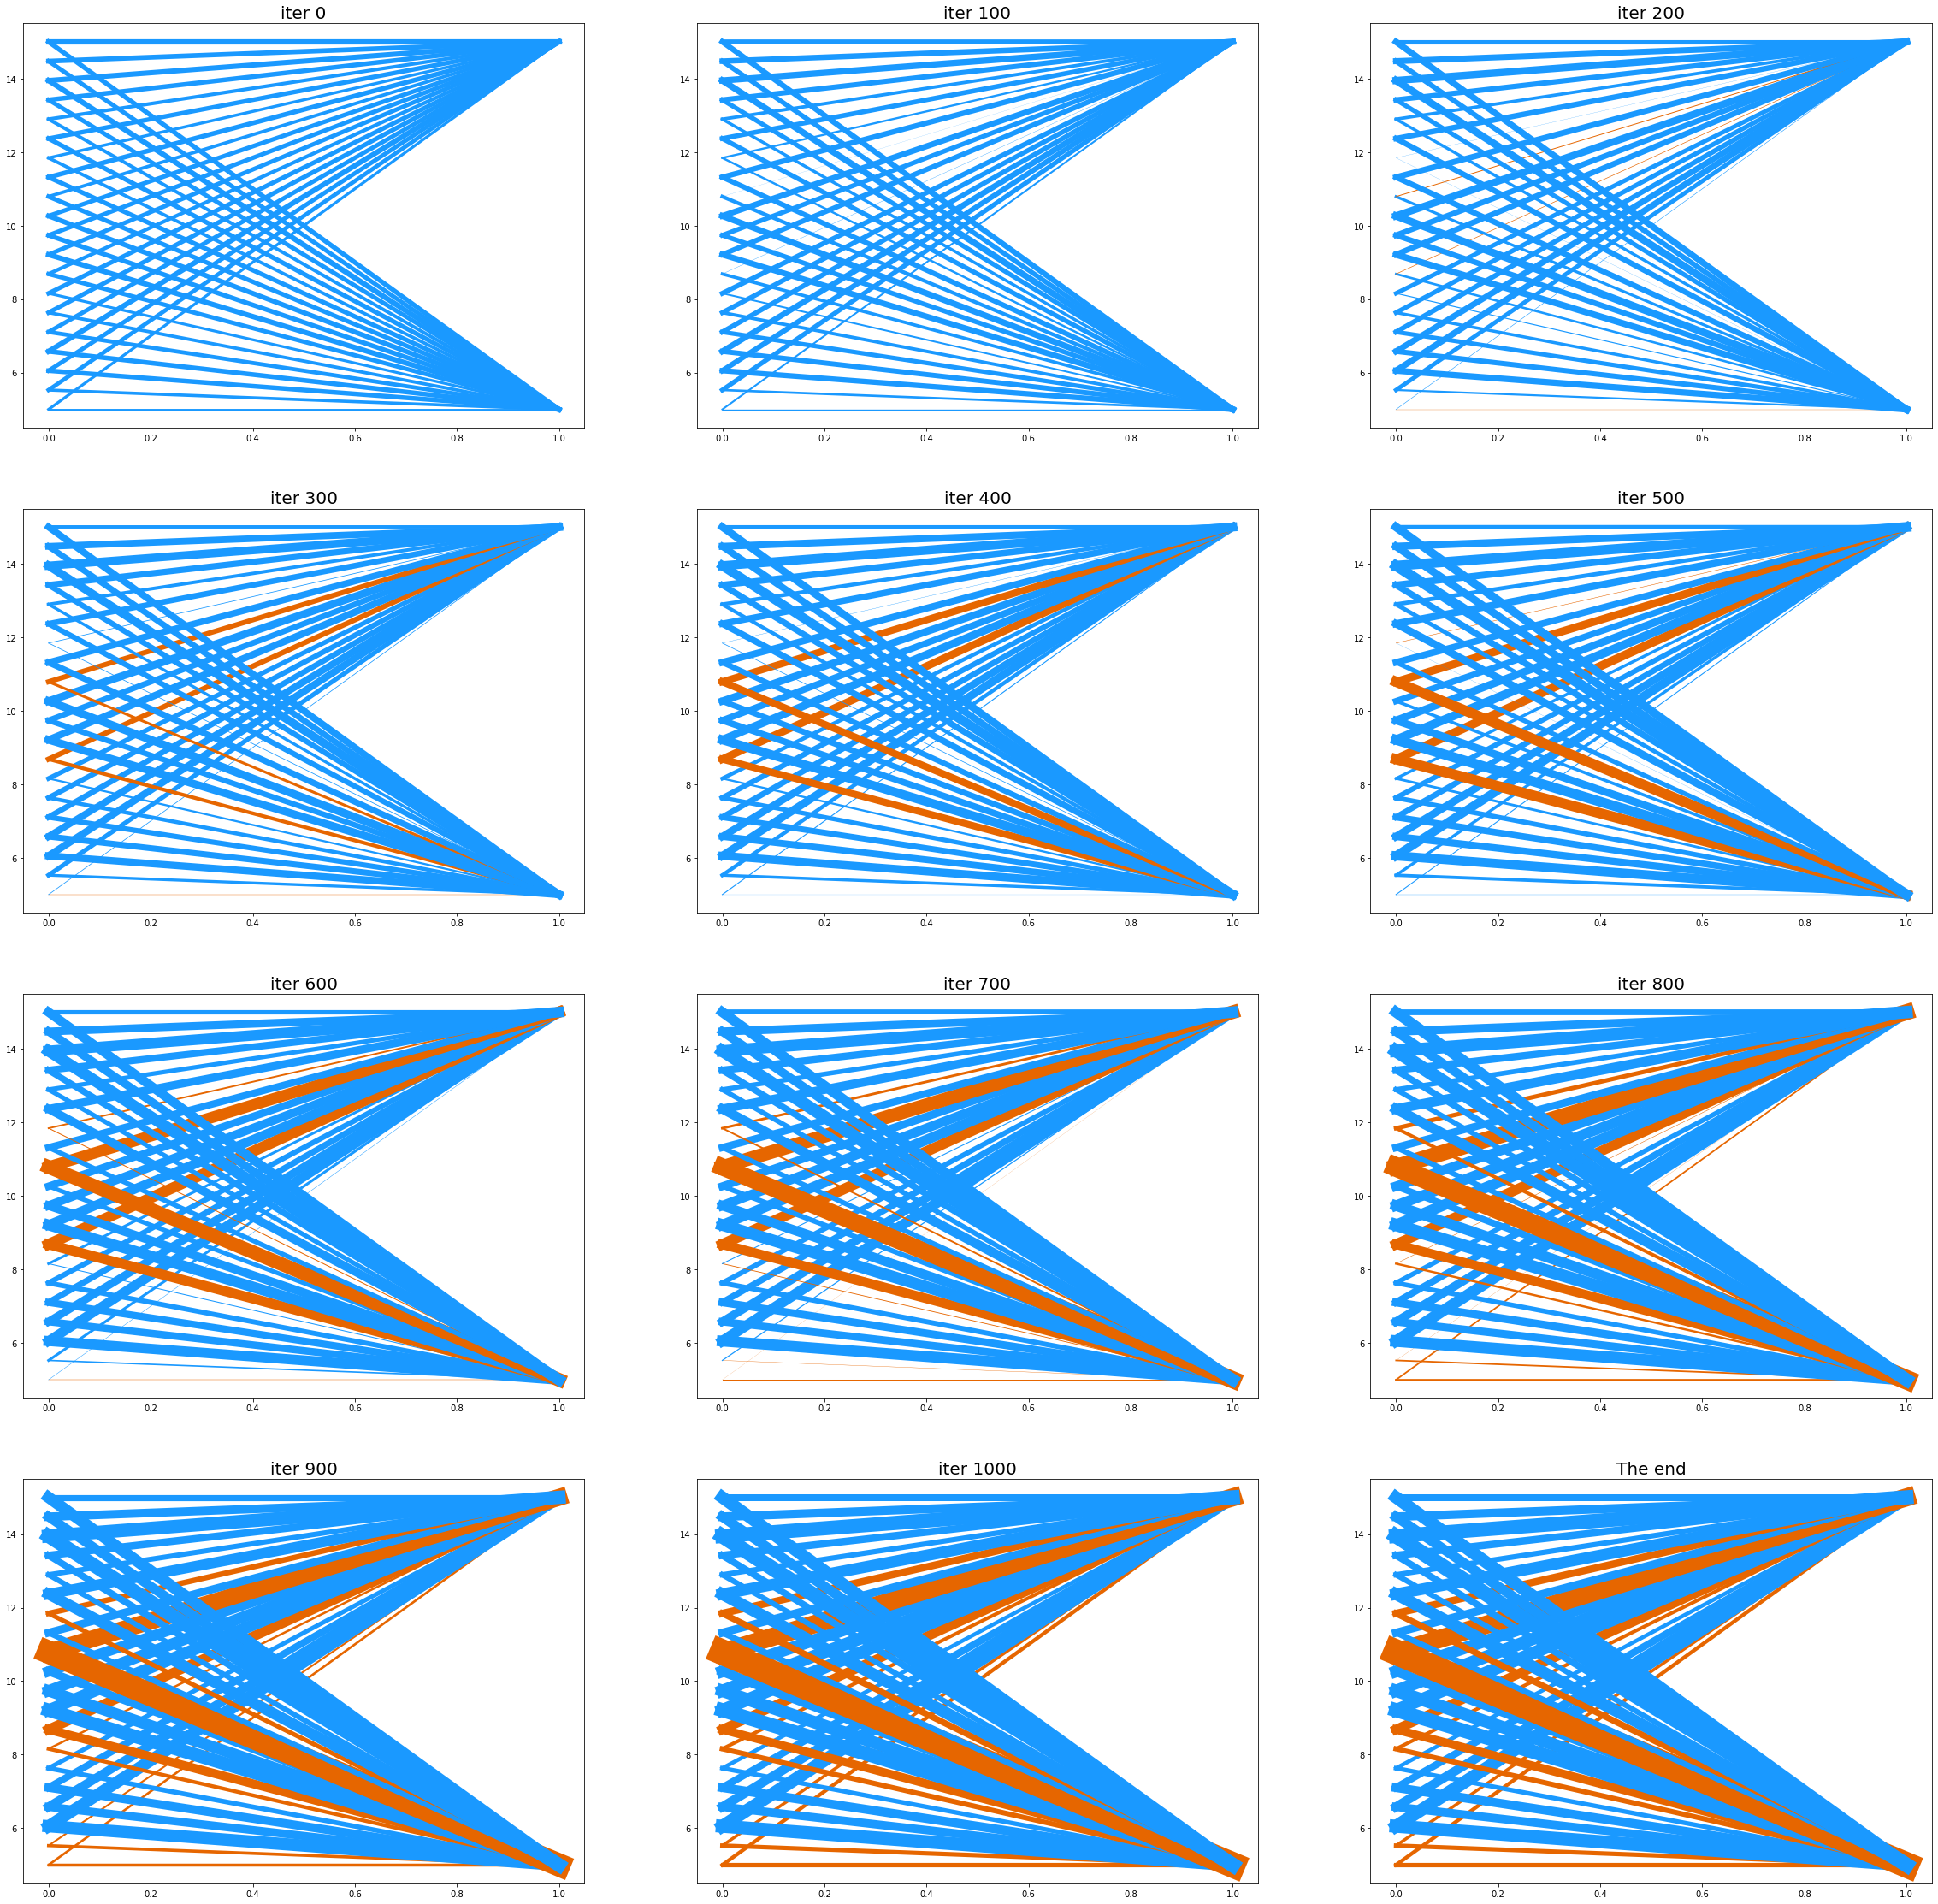

torch.Size([3266, 2])
torch.Size([620, 2])
Weights:
N1 & N2 & diff \\
-51.66 & -44.27 & -7.39\\
-51.2 & -36.22 & -14.99\\
153.02 & 147.9 & 5.12\\
98.09 & 105.87 & -7.78\\
104.97 & 83.49 & 21.48\\
52.97 & 46.15 & 6.83\\
-60.1 & -41.67 & -18.42\\
-99.25 & -110.91 & 11.66\\
163.5 & 144.29 & 19.2\\
144.34 & 142.24 & 2.11\\
111.44 & 137.73 & -26.29\\
-298.66 & -211.97 & -86.69\\
68.37 & 94.25 & -25.87\\
-73.78 & -85.07 & 11.29\\
138.91 & 134.51 & 4.4\\
63.43 & 61.46 & 1.97\\
78.83 & 85.56 & -6.73\\
174.01 & 165.8 & 8.2\\
114.86 & 101.23 & 13.63\\
144.36 & 80.02 & 64.34\\
similarity: 0.9797847867012024


In [1]:
# from experiment import learnSTDP
from stdp import STDP
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from metrics import weights_similarity

im1 = np.array(Image.open(f'images/crosses.tif'))
im2 = np.array(Image.open(f'images/lena1.tif'))
model = STDP(syn_params={'w_mean': 50, 'flat': True, 'trace_dur': 10}, N=20, fix_image=True)

result = model.learn(im1, im2, intersection=1, image_dur=15, image_sleep=5, iters=1100, inp_amp=500, verbose=0, encoding='poisson', W_changes_step=100)
plt.show()
print(model.ng_inp['spike', 0].shape)
print(model.ng_out['spike', 0].shape)

# Similarity
print("\33[1mWeights:")
print("N1 & N2 & diff \\\\")
for i in range(model.syn.W.shape[0]):
    print(f"{round(model.syn.W[i, 0].item(), 2)} & {round(model.syn.W[i, 1].item(), 2)} & {round((model.syn.W[i, 0] - model.syn.W[i, 1]).item(), 2)}\\\\")
print(f"similarity: {weights_similarity(model.syn.W)}")


20xBatch: 1/1 (100%) 92.050ms


Text(0.5, 1.0, 'Image 1')

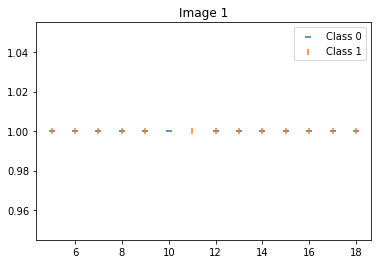

In [7]:
import torch
image, ng_inp, ng_out = model.test()
zeros = ng_out['spike', 0][:, 1] == 0
plt.scatter(x=ng_out['spike', 0][zeros][:, 0], y=torch.ones(zeros.sum()), marker='_')
plt.scatter(x=ng_out['spike', 0][~zeros][:, 0], y=torch.ones((~zeros).sum()), marker='|')
plt.legend(['Class 0', 'Class 1'])
plt.title(f"Image {image}")

